# CSL558: Machine Learning 


## Module 3: Traditional Machine Learning Techniques



### Tutorial 3.1:  Regression using SKlearn  



# Introduction to Sklearn.
https://scikit-learn.org/stable/index.html

https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py


# Building Linear Regression in Sklearn

# Regression 


Slope-Intercept Form
The most common form is the slope-intercept equation of a straight line:

y=mx+b
![title](line_graph.jpg)


Equation of a Straight Line y=mx+b
Slope (or Gradient)	Y Intercept
 
Example: 

y = 2x + 1

Slope: m = 2

Intercept: b = 1

Explore more about lines here 

Straight Line : https://www.mathsisfun.com/data/straight_line_graph.html 

Gradient : https://www.mathsisfun.com/gradient.html 

**Derivaties** : 
https://www.mathsisfun.com/calculus/derivatives-introduction.html

Play more with derivatives 
https://www.mathsisfun.com/calculus/derivative-plotter.html

Linear Regression using Gradient Descent : 


https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931


![title](Grad_des.gif)

This is how we want our line to be best fit  


![title](animation.gif)

Illustration of how the gradient descent algorithm works

![title](gradient.jpeg)

More Discussion on the Regression - Linear 

Linear regression is a method used to find a relationship between a dependent variable and a set of independent variables. In its simplest form it consist of fitting a function y=w.x+b to observed data, where y is the dependent variable, x the independent, w the weight matrix and b the bias.

Illustratively, performing linear regression is the same as fitting a scatter plot to a line. As can be seen for instance in Fig 

![title](lreg.jpg)

# Error Function


Squared Loss, which measures the average of the squared difference between an estimation and the ground-truth value.

MSE - Mean Squared Error

he squared loss function can be seen in Eq. (1), where M is the number of training points, y is the estimated value and y^ is the ground-truth value.

\begin{gather}
\mathcal{L}(y,\hat{y}) = \dfrac{1}{M} \sum_{i=1}^{M} (\hat{y}_i-y_i)^2
\label{eq:sq_loss}
\end{gather}


e can further expand Eq. (1) in order to incorporate our model. Doing so we obtain Eq. (2).

\begin{gather}
\mathcal{L}(y,x,w) = \dfrac{1}{M} \sum_{i=1}^{M} \big(\hat{y}_i- (w^Tx_i+b)\big)^2
\label{eq:model_loss}
\end{gather}

Naturally, we want a model with the smallest possible MSE, therefore we’re left with the task of minimizing Eq. (2).


# Gradient Descent

to minimize Eq. (2) is Gradient Descent, which is based on using gradients to update the model parameters (w and b in our case) until a minimum is found and the gradient becomes zero.

![](sgd.gif)


Taking the gradients of Eq. (2) (the derivatives with respect to w and b) yields Eqs. (3) and (4).

\begin{gather}
\label{eq:dl_dw}
\dfrac{\partial\mathcal{L}(y,x,w)}{\partial w} = -\dfrac{1}{M} \sum_{i=1}^{M} 2x_i\big(\hat{y}_i - (w^Tx_i+b)\big)\\
\label{eq:dl_db}
\dfrac{\partial\mathcal{L}(y,x,w)}{\partial b} = -\dfrac{1}{M} \sum_{i=1}^{M} 2\big(\hat{y}_i - (w^Tx_i+b)\big)\\
\end{gather}


Remember from calculus that the gradient points in the direction of steepest ascent, but since we want our cost to decrease we invert its symbol, therefore getting the Eqs. 5 and 6:
\begin{gather}
w = w - \alpha \dfrac{\partial\mathcal{L}(y,x,w)}{\partial w}\\
b = b - \alpha \dfrac{\partial\mathcal{L}(y,x,w)}{\partial b}
\end{gather}



Where α is called learning rate and relates to much we trust the gradient at a given point, it is usually the case that 0<α<1. Setting the learning rate too high might lead to divergence since it risks overshooting the minimum, as illustrated by Fig. 3.[1] 
![](diverging.gif)

![title](Regress.png)


In [27]:
import pandas as pd 

In [28]:
dataset=pd.read_csv('student_scores.csv')

In [29]:
dataset.shape

(25, 2)

In [31]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
import matplotlib.pyplot as plt 
#matlplotlib inline

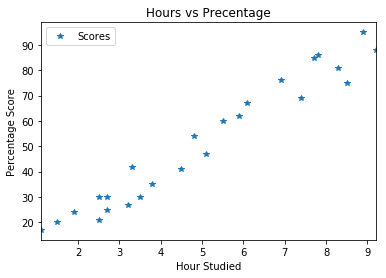

In [9]:
#write your code 
dataset.plot(x='Hours',y='Scores',style='*')
plt.title('Hours vs Precentage')
plt.xlabel('Hour Studied')
plt.ylabel('Percentage Score')
plt.show()

In [32]:
# method to retrieve rows from a Data frame
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [11]:
import numpy as np 
from sklearn.model_selection import train_test_split

#x,y=np.arange(10).reshape((5,2)),range(5)

In [12]:
#x 
#list(y)

In [33]:
?train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

x_train.shape, x_test.shape, y_train.shape, y_test.shape


((20, 1), (5, 1), (20,), (5,))

In [34]:
len(x_train),len(y_train)

(20, 20)

In [35]:
len(x_test), len(y_test)

(5, 5)

In [36]:
x_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [17]:
from sklearn.linear_model import LinearRegression

In [37]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [38]:
regressor.intercept_

2.018160041434683

In [39]:
 regressor.coef_

array([9.91065648])

In [40]:
# For Testing 
y_pred=regressor.predict(x_test)

In [41]:
df=pd.DataFrame({'Actual':y_test, 'Predicited':y_pred})
df

,Actual,Predicited
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


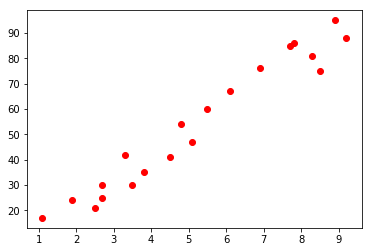

In [42]:
#to see the relationship between the training data values
plt.scatter(x_train, y_train, c='red')
plt.show()

Text(0, 0.5, 'predicted values')

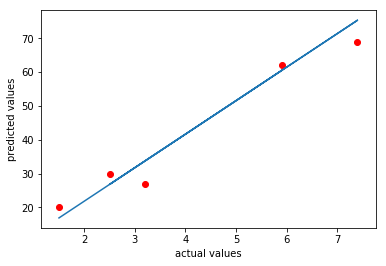

In [43]:
#to see the relationship between the predicted 
#brain weight values using scattered graph
plt.plot(x_test,y_pred)   
plt.scatter(x_test,y_test,c='red')
plt.xlabel('actual values')
plt.ylabel('predicted values')

In [25]:
# To Evalaute the model 

In [44]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
